In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
df = pd.read_csv('simulation_results.csv', header=0)

In [32]:
df

,simulation,trial,start_time,end_time,duration,duration_seconds,type,sequence
0,1,0,02:20:17 PM,02:26:15 PM,00:05:58,358,opm,"bowl, breakfast-cereal, cup, spoon, milk"
1,1,1,02:26:17 PM,02:31:24 PM,00:05:07,307,opm,"bowl, breakfast-cereal, cup, spoon, milk"
2,1,2,02:31:26 PM,02:36:32 PM,00:05:06,306,opm,"bowl, breakfast-cereal, cup, spoon, milk"
3,1,3,02:36:36 PM,02:41:44 PM,00:05:08,308,opm,"bowl, breakfast-cereal, cup, spoon, milk"
4,1,4,02:41:47 PM,02:46:15 PM,00:04:28,268,opm,"bowl, breakfast-cereal, cup, spoon, milk"
...,...,...,...,...,...,...,...,...
95,5,5,01:38:15 PM,01:46:01 PM,00:07:46,466,baseline,"breakfast-cereal, cup, bowl, spoon, milk"
96,5,6,01:46:03 PM,01:54:11 PM,00:08:08,488,baseline,"breakfast-cereal, cup, bowl, spoon, milk"
97,5,7,01:54:13 PM,02:01:31 PM,00:07:18,438,baseline,"breakfast-cereal, cup, bowl, spoon, milk"
98,5,8,02:01:33 PM,02:09:04 PM,00:07:31,451,baseline,"breakfast-cereal, cup, bowl, spoon, milk"


In [6]:
custom_cmap2 = ["#46327e", "#277f8e", "#4ac16d"]

In [35]:
df[['duration_seconds', 'type']].groupby(['type']).mean()

,duration_seconds
type,
baseline,379.64
opm,374.72


In [42]:
duration_opm = df.loc[df['type'] == 'opm']['duration_seconds'].mean()

In [43]:
duration_baseline = df.loc[df['type'] == 'baseline']['duration_seconds'].mean()

In [47]:
durations = pd.Series([duration_baseline, duration_opm])

In [49]:
durations.pct_change() * 100

0         NaN
1   -1.295965
dtype: float64

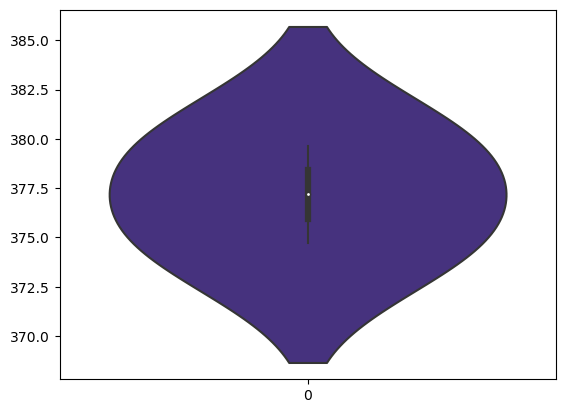

In [53]:
ax = sns.violinplot(data=durations,
                    palette=custom_cmap2,
                    saturation=1)